<a href="https://colab.research.google.com/github/pauloabq/quarentena-dados/blob/master/Quarentena_dados_Aulas_1_e_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AULA 1: Panda, Pyton e Colabs


**Google Colab:** É um notebook do google, com uma máquina / ambiente para processar comandos pyton direto no navegador. Não precisa de configuração. Já vem pronto.
Suporta código ou texto 

É uma das ferramenta mais utilizadas pelos cientistas de dados.

Abaixo, básico do básico: comandos para exibir texto / variáveis, e atribuir valores a variáveis.

Em cada **célula** (linha/bloco de código), é possível executar através do botão 'play'. Ou excluir, ao passar o mouse. 





In [0]:
print("Paulo Albuquerque")
print("Oi, mundo")

Paulo Albuquerque
Oi, mundo


In [0]:
nome_do_filme = "Totoro, o filme"

In [0]:
print(nome_do_filme)

Totoro, o filme


In [0]:
nome_do_filme

'Totoro, o filme'

## Lendo dados da MovieLens | GroupLens

Primeiro dataset com informações de filmes
https://grouplens.org/datasets/movielens/

Baixar a versão small (aprox. 100k linhas).

Vamos importar este dataset utilizando uma lib chamada [Pandas](https://pandas.pydata.org/) (já instalada nessa máquina do Colab) - projeto open source para análise e manipulação de dados com pyton.
- importar a biblioteca
- ler o arquivo CSV



In [0]:
import pandas as pd
# pd.read_csv retorna Dataframe do pandas. filmes é um dataframe pandas
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

# .head(X) retorna X linhas do DataFrame.
filmes.columns = ["filmeId","titulo","generos"]
filmes.head(10)


,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


?filmes - exibe uma ocumentação do método ou atributo

In [0]:
?filmes.head

In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Exibindo o uma dimensão do dataframe (tamanho e qtd de colunas)

In [0]:
avaliacoes.shape

(100836, 4)

Exibe o número de itens

In [0]:
len(avaliacoes)

100836

Alterando o nome das colunas


In [0]:
avaliacoes.columns = ["usuárioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para obter apenas as avaliações do **filmeId 1:**

In [0]:
avaliacoes.query("filmeId==1")

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Mostra estatísticas gerais do dataframe de avaliações de filmes com `avaliacoes.describe()`.



In [0]:
avaliacoes.describe()

,usuárioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Da mesma forma podemos ter um describe do dataframe que trouxe apenas os registros com **filmeId 1** com `avaliacoes.query("filmeId==1").describe()`

In [0]:
avaliacoes.query("filmeId==1").describe()

,usuárioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Retorna uma série com a coluna **nota**

In [0]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Fazendo **query** - Informações do **filme id = 1**
- Média de cada uma das colunas


In [0]:
avaliacoes.query("filmeId==1").mean()

usuárioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

- Média de apenas a coluna **nota**

In [0]:
avaliacoes.query("filmeId==1")["nota"].mean()

3.9209302325581397

Para obter em uma variável o dataframe do **filmeid = 1** podemos atribuir a uma variável e utiliza-la para obter as informações de média


In [0]:
avaliacoes_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_filme_1.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [0]:
avaliacoes_filme_1.mean()

usuárioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [0]:
avaliacoes_filme_1["nota"].mean()

3.9209302325581397

**Agrupando** pela coluna de **filmeId** e obtendo a média das notas.

---



In [0]:
notas_medias_filmes = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Unindo informações de um Dataframe **filmes** com um type Series **notas_medias_filmes** - fazendo um 'join'

In [0]:
filmes_com_media = filmes.join(notas_medias_filmes, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Ordenando os dados depois de fazer o join


In [0]:
filmes_com_media.sort_values("nota", ascending=False)
filmes_com_media.head()


,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


**Visualizando** gráficos para entender comportamentos de votações para 3 filmes: 1,2 e 102084.

Histograma do Pandas que usa a lib **matpotlib**

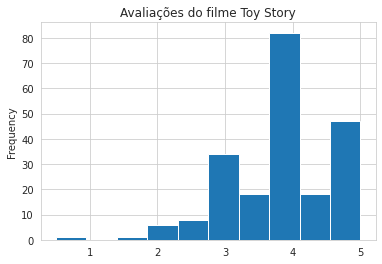

In [0]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind="hist", title="Avaliações do filme Toy Story")
plt.show()

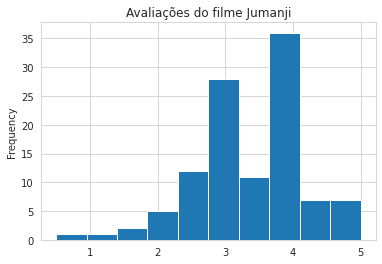

In [0]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind="hist", title="Avaliações do filme Jumanji")
plt.show()

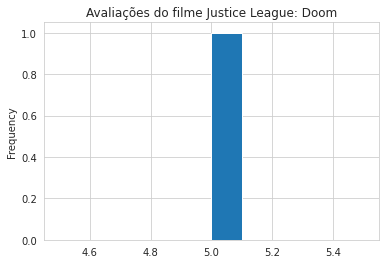

In [0]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind="hist", title="Avaliações do filme Justice League: Doom")
plt.show()

# Desafios aula 1



## Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.



### Minha solução:

In [0]:
filmes_sem_nota = filmes[~filmes.filmeId.isin(avaliacoes.filmeId)]
filmes_sem_nota

,filmeId,titulo,generos
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


### Solução Instrutor


In [0]:
selecao = filmes_com_media['nota'].isnull()
filmes_com_media[selecao]

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do Guilherme Silveira
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.



### Minha solução:

In [0]:
filmes_com_media = filmes_com_media.rename(columns = {'nota':'nota_media'})
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do Guilherme Silveira
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.


In [0]:
# filmes_com_media : dataframe que é um join do dataframe Filmes com série Médias
# total_votos_por_filme: criando a série que contem a contagem  (quantidade) de votos por filmeId
# depois faz um join dos dois

total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count()
total_votos_por_filme.head()


filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [0]:
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'nota': 'total_votos'})
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do Thiago Gonçalves
Arredondar as médias (coluna de nota média) para duas casas decimais.

### Minha solução

In [0]:
filmes_com_media_arred = filmes_com_media_e_votos.round({"nota_media": 2})
filmes_com_media_arred

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


### Solução Instrutor


In [0]:
filmes_com_media_e_votos['nota_media'] = filmes_com_media_e_votos['nota_media'].round(2)
filmes_com_media_e_votos 

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0



## Desafio 5 do Allan Spadini
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

### Minha resposta:

In [0]:
lista_generos = filmes.query("filmeId in [1,2.3]")["generos"].str.split("|")
lista_generos

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
Name: generos, dtype: object

### Solução Instrutor


In [0]:
generos_df = filmes_com_media_e_votos.generos.str.get_dummies('|')
generos = generos_df.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']









## Desafio 6 da Thais André
Contar o número de aparições de cada genero.

### Solução instrutor:



In [0]:
total_filmes_por_genero = filmes_com_media_e_votos.generos.str.get_dummies().sum().sort_values(ascending=False)
total_filmes_por_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

## Desafio 7 do Guilherme Silveira
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

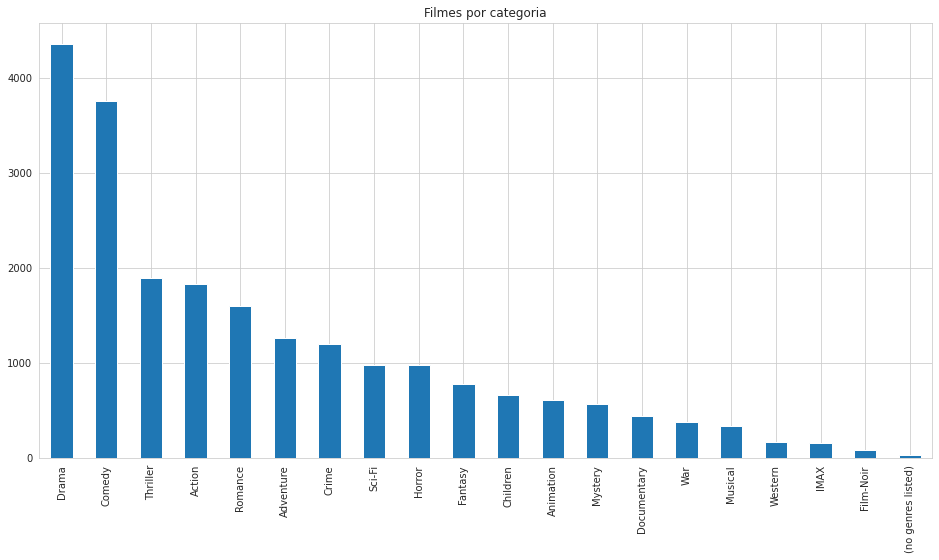

In [0]:
 filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind="bar",
    title="Filmes por categoria",
    figsize=(16,8) 
    )
 plt.show()

---

# AULA 2 - Médias, medianas e visualização de dados


Com o **get_dummies**, os dados são separados em colunas, e se o valor aparece na linha, o valor da coluna é 1, senão é 0.

É retornado um series (uma série de dados com índice e valor - o nome do gênero (o valor que foi separado com o get_dummies) é o índice.

Assim, temos a resposta do **Desafio 5**

In [0]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)

# ordenando pelos indices (ou, nome da categoria)
#filmes["generos"].str.get_dummies("|").sum().sort_index()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Explorando os dados de um DataFrame ou Series usando index ou values (mostra a composição dos itens).

Ex:

In [0]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [0]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

In [0]:
filmes["generos"].str.get_dummies("|").sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

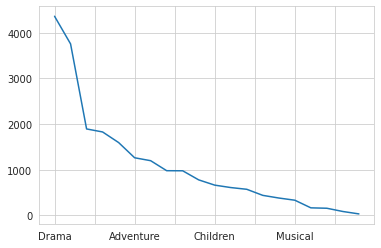

In [0]:
# por padrão, o plot gera um gráfico e linha, o que não faz sentido, pois não estamos avaliando números, e sim Categorias.

filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot()


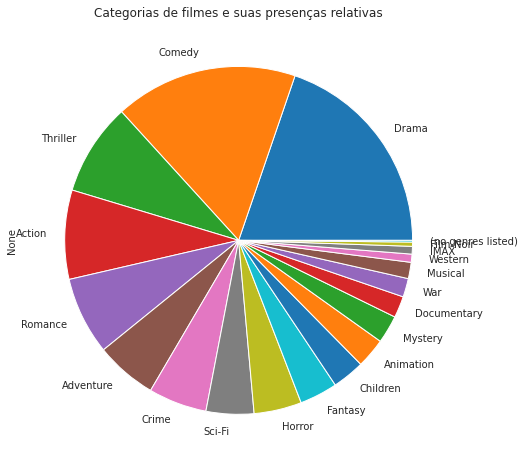

In [0]:
# ainda não ficou legal. Olha pro gráfico. não dá pra tirar conclusão nenhuma

filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind="pie",
    title="Categorias de filmes e suas presenças relativas",
    figsize=(8,8))


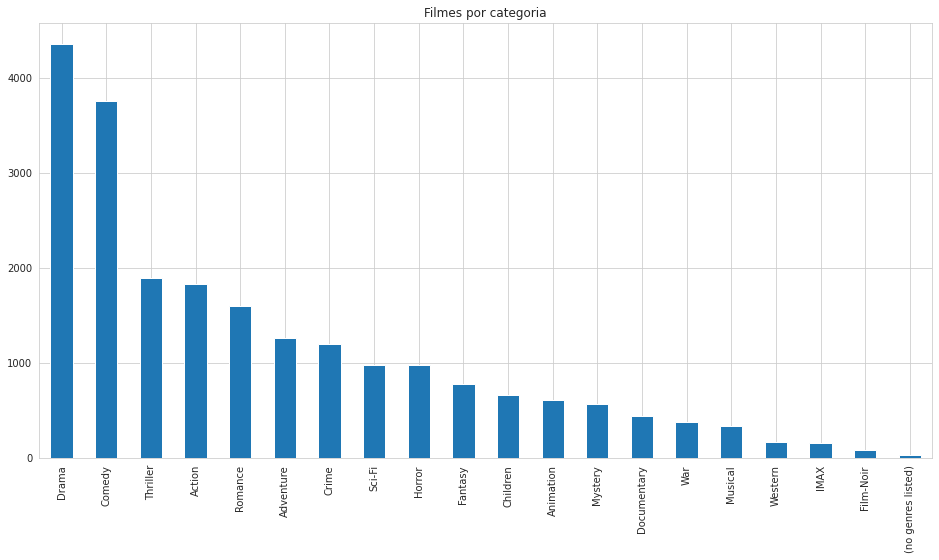

In [0]:
 filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind="bar",
    title="Filmes por categoria",
    figsize=(16,8) 
    )
 plt.show()


## Seaborn barplot


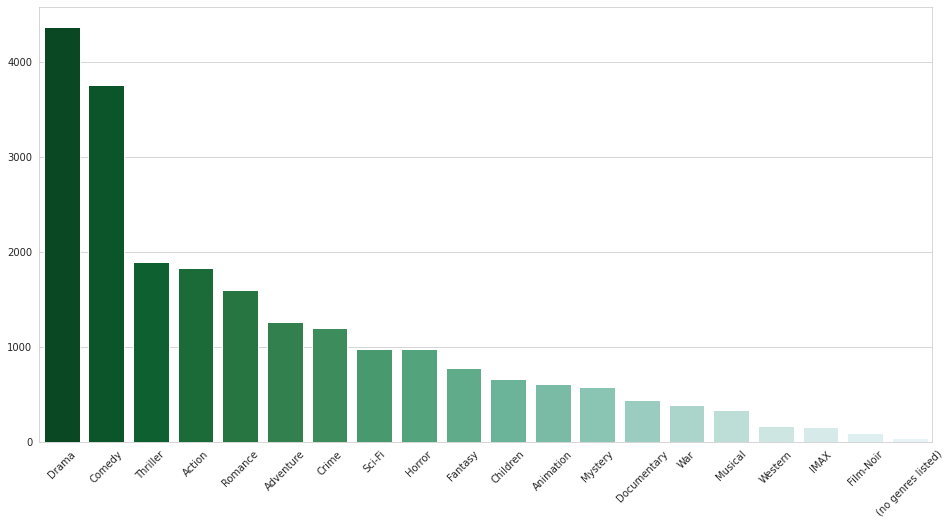

In [0]:
import seaborn as sns
# defininfo linha do gráfico
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)

plt.figure(figsize=(16,8))

b_categorias = sns.barplot(x=filmes_por_genero.index,
                           y=filmes_por_genero.values,
                           palette=sns.color_palette("BuGn_r",n_colors=len(filmes_por_genero) + 2)
                           )

# Resposta do Desafio 1!
for item in b_categorias.get_xticklabels():
  item.set_rotation(45)
plt.show()

## Criando uma função para visualizar o histograma, de acordo com os filmes

Primeiro, olhando um 'pedaço' de nossos dados para verificar notas mais 'quebradas'



In [0]:
filmes_com_media.sort_values("nota_media", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota_media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

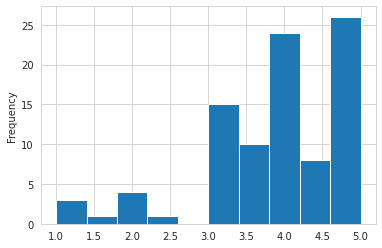

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

#Mágico de Oz
plot_filme(919)


count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

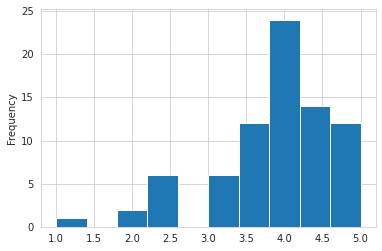

In [0]:
#Little Miss Sunshine.
plot_filme(46578)

Dá pra perceber melhor como está a concentração das notas.

Agora, vamos retornar na função um outro gráfico **Boxplot**

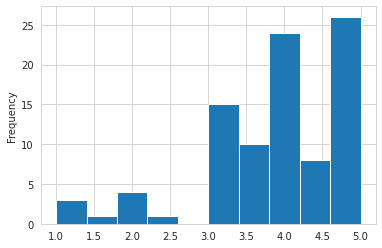

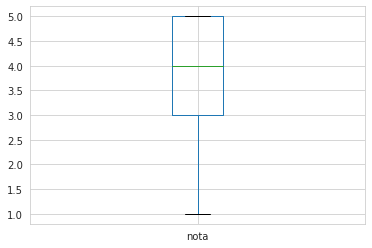

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

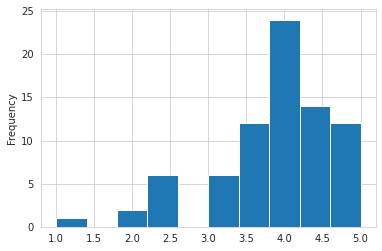

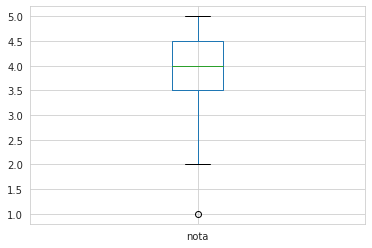

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(46578)

Neste segundo ponto, temos a 'bolinha' na linha 1. Isso é um **outlier** (basicamente, um ponto fora da curva - ou, os vocot estão concentrados entre 2 e 5, mas há poucas notas 1, que fogem da análise, e portanto, ela é um outlier).

Agora, vamos plotar vários filmes lado a lado para fazer a comparação no mesmo gráfico (boxplot). Repare que neste exemplo, nos ilmes 1, 2 e 46578 temos representados os outliers

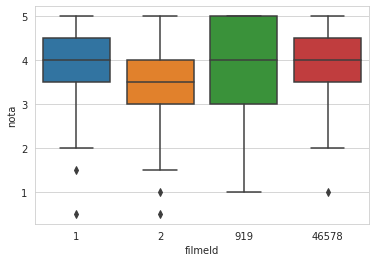

In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]")
           , x ="filmeId"
           , y="nota"
           )

# Desafios Aula 2

## Desafio 1 do Guilherme Silveira
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.
[link text](#seaborn-barplot)



### Minha solução

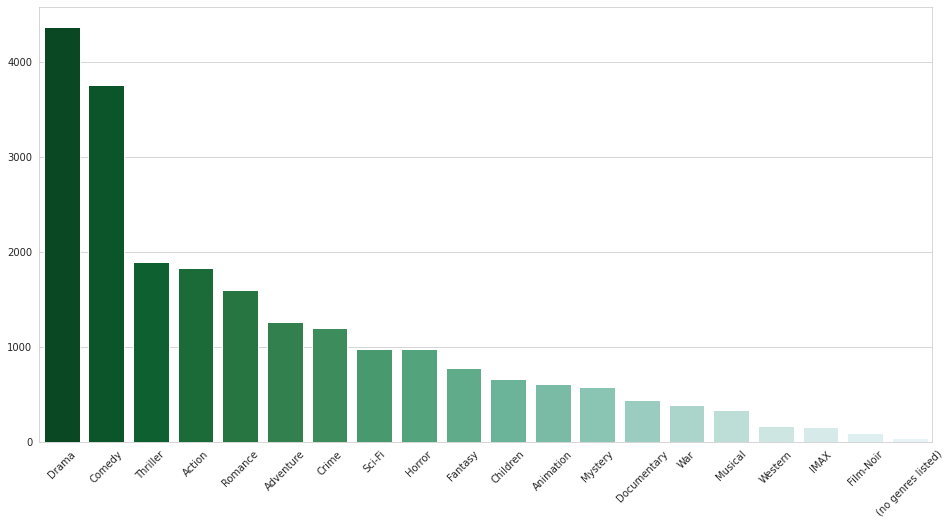

In [0]:
import seaborn as sns
# defininfo linha do gráfico
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)

plt.figure(figsize=(16,8))

b_categorias = sns.barplot(x=filmes_por_genero.index,
                           y=filmes_por_genero.values,
                           palette=sns.color_palette("BuGn_r",n_colors=len(filmes_por_genero) + 2)
                           )

# Resposta do Desafio 1!
for item in b_categorias.get_xticklabels():
  item.set_rotation(45)
plt.show()

### Solução Instrutor

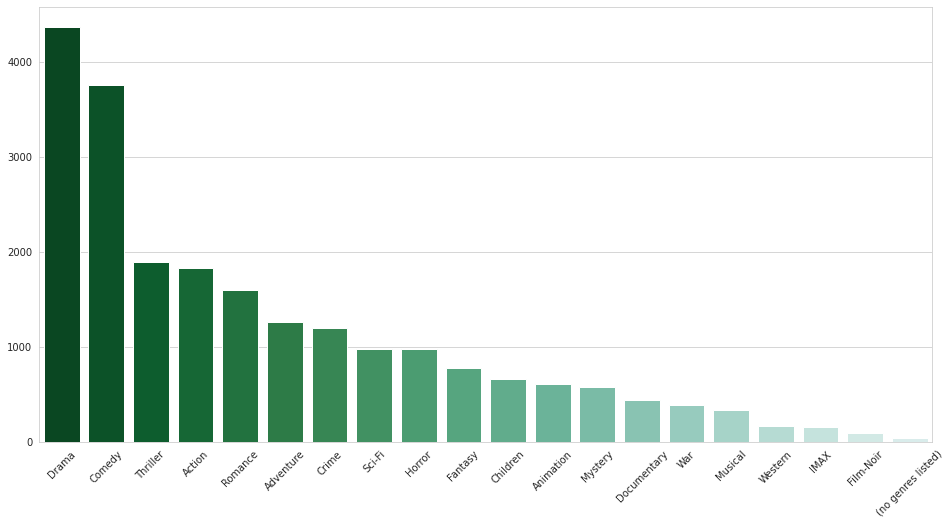

In [0]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

plt.xticks(rotation=45)
plt.show()

## Desafio 2 do Paulo Silveira
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

### Solução Instrutor

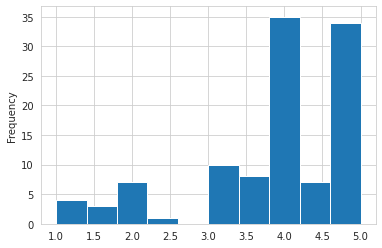

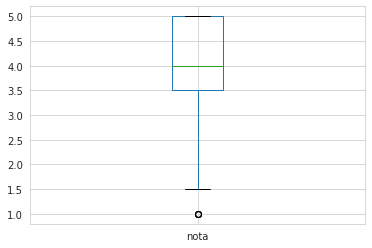

count    109.000000
mean       3.894495
std        1.103600
min        1.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(924) # 2001: A Space Odyssey (1968)

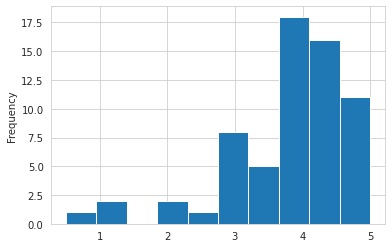

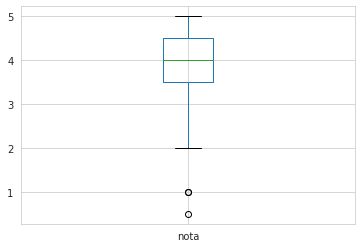

count    64.000000
mean      3.898438
std       1.008612
min       0.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(55820) # No Country for Old Men (2007)

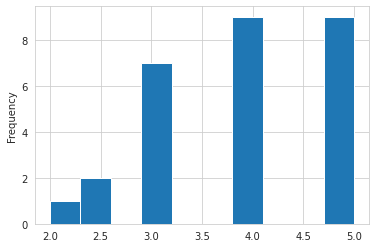

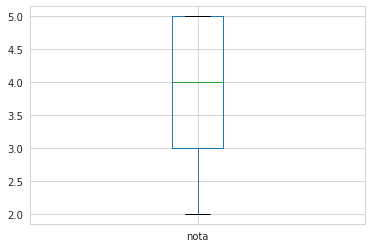

count    28.000000
mean      3.892857
std       0.946310
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(2150) # Gods Must Be Crazy, The (1980)

## Desafio 3 do Paulo Silveira
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

### Solução instrutor

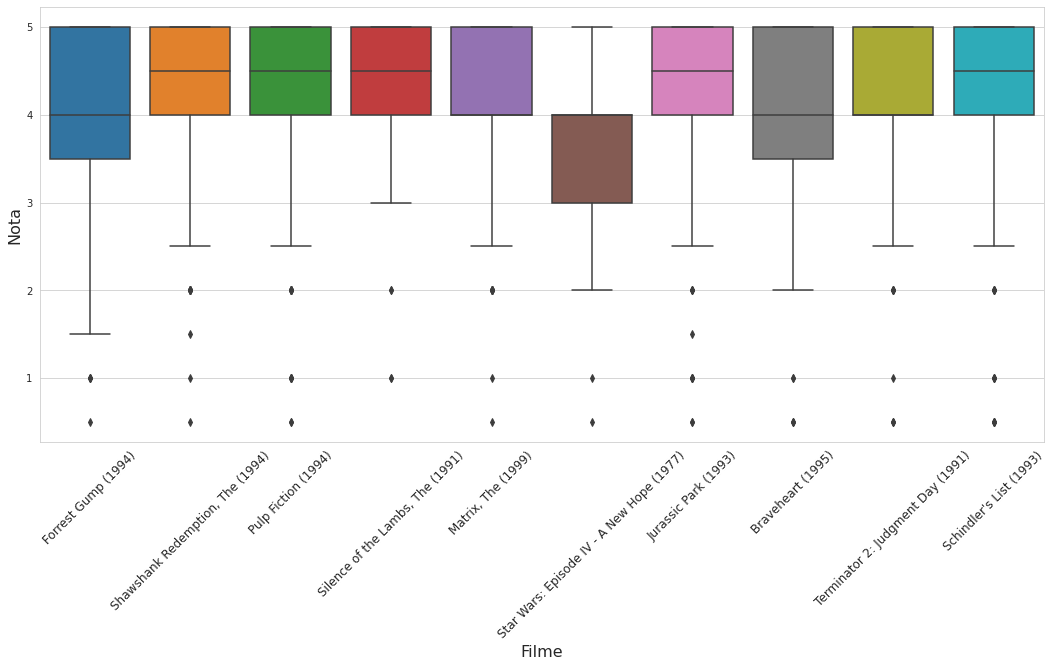

In [0]:
# filmes_com_media_e_votos vem do desafio da aula 01
top_10_votos_por_filme = filmes_com_media_e_votos.sort_values(by='total_votos', ascending=False).head(10)
top_10_votos_por_filme
top_10_votos_por_filme_titulos = top_10_votos_por_filme['titulo'].to_list()
top_10_votos_por_filme_ids = top_10_votos_por_filme['filmeId'].to_list()

plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y='nota', data=avaliacoes.query(f"filmeId in {top_10_votos_por_filme_ids}"))
ax.set_xticklabels(top_10_votos_por_filme_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()


## Desafio 4 do Guilherme Silveira
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.


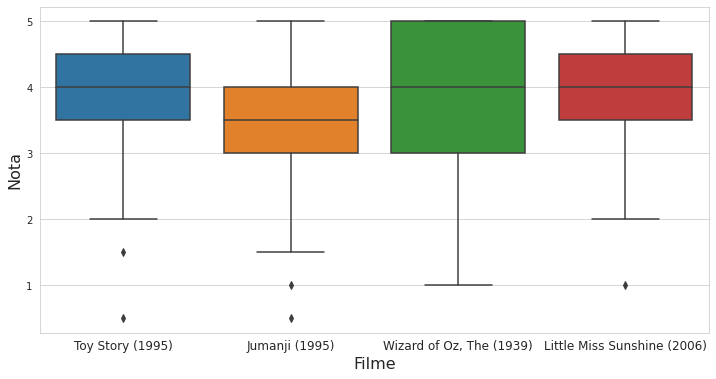

In [0]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

## Desafio 5 do Allan Spadini
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    notas = avaliacoes.query(f'filmeId == {filme_id}')['nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------')

In [0]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


In [0]:
explora_filme(2041)
explora_filme(7541)
explora_filme(160080)

Filme: Condorman (1981)

Moda: [4.]
Média: 3.3333333333333335
Mediana: 4.0
------------
Filme: 100 Girls (2000)

Moda: [3.5]
Média: 3.25
Mediana: 3.5
------------
Filme: Ghostbusters (2016)

Moda: [3.  3.5]
Média: 3.125
Mediana: 3.25
------------


In [0]:
explora_filme(177593)
explora_filme(1178)
explora_filme(4334)

Filme: Three Billboards Outside Ebbing, Missouri (2017)

Moda: [4.5 5. ]
Média: 4.75
Mediana: 4.75
------------
Filme: Paths of Glory (1957)

Moda: [5.]
Média: 4.541666666666667
Mediana: 4.75
------------
Filme: Yi Yi (2000)

Moda: [5.]
Média: 4.6
Mediana: 5.0
------------


## Desafio 6 da Thais André
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

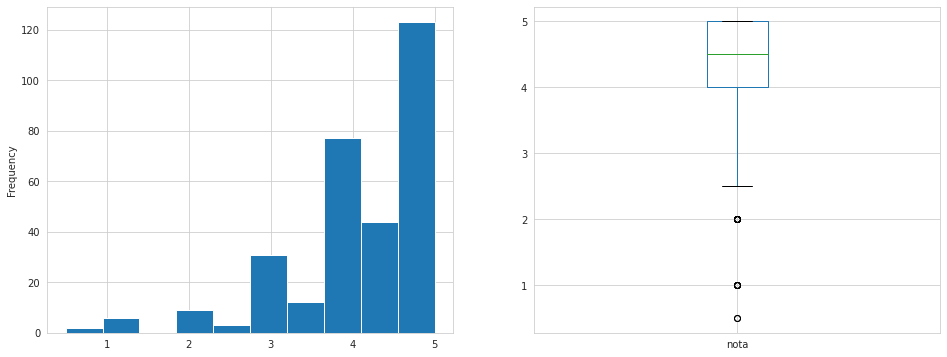

In [0]:
pulp_fiction = avaliacoes.query('filmeId == 296')['nota']
f, axes = plt.subplots(1, 2, figsize=(16, 6))
pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1])

plt.show()

---













## Desafio 7 do Thiago Gonçalves
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


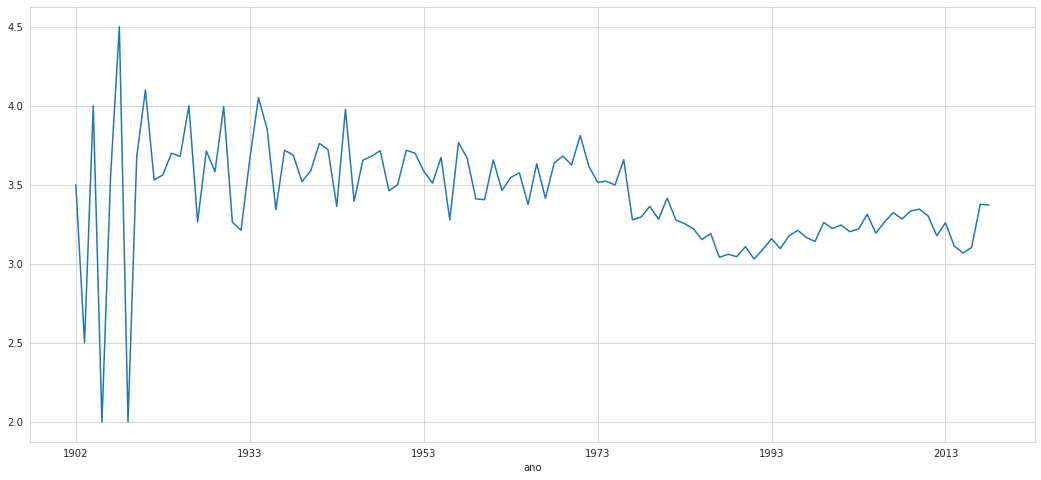

In [0]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['nota_media'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()